In [3]:
Name = '../discharges/2024/202402/20240215/M/591M 2024-02-15 13:54:34.nxs'
#Name_vac = 'discharges/2024/202403/20240305/M/767M 2024-03-05 14:13:38.nxs'
Name_probe1 = 'Rigol_waves/468_RIGOL_CH1.txt'
Name_probe2 = 'Rigol_waves/468_RIGOL_CH2.txt'
Name_probe3 = 'Rigol_waves/468_RIGOL_CH3.txt'
Name_probe4 = 'Rigol_waves/468_RIGOL_CH4.txt'

#Num = '607M'


MP01_NS = 216.7*1e-4 #cm^2
MP02_NS = 128.9*1e-4
MP03_NS = 179.6*1e-4
MP04_NS = 149.8*1e-4

MP1_NS = 150*1e-4 #cm^2
MP2_NS = 199*1e-4
MP3_NS = 181*1e-4
MP4_NS = 182*1e-4
K_rog = 7e6
aR = 0.110
R0 = 0.248
aZ = 232

R1 = R0+aR
R2 = R0-aR

import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack


f = h5py.File(Name, 'r')
#N_discharge = '1047T'
Adress = '../Exported data/'

#f1 = h5py.File(Name_vac, 'r')
#Adress = '../Exported data/'
def integrate(time,sig):
    dt = (time[-1]-time[0])/(len(time)-1)
    return  np.cumsum(sig)*dt
    
import pandas as pd

In [4]:
from jupyterlab_h5web import H5Web
H5Web(Name)

<jupyterlab_h5web.widget.H5Web object>

In [5]:
f['Lcard-2'].keys() #для зондов

<KeysViewHDF5 ['MP-1 Lcard-2:7:data', 'MP-2 Lcard-2:8:data', 'MP-3 Lcard-2:9:data', 'MP-4 Lcard-2:10:data', 'Rog. internal Lcard-2:11:data', 'Time', 'VL-1 Lcard-2:0:data', 'VL-2 Lcard-2:1:data', 'VL-3 Lcard-2:2:data', 'VL-4 Lcard-2:3:data', 'VL-5 Lcard-2:4:data', 'VL-6 Lcard-2:5:data', 'VL-7 Lcard-2:6:data', 'acq_time']>

In [6]:
f['AD7606-1'].keys()#для Роговского

<KeysViewHDF5 ['HF_coil_obereg AD7606-1:8:data', 'MP_out AD7606-1:5:data', 'PEM AD7606-1:7:data', 'PF 170 rog AD7606-1:4:data', 'PF 400 rog AD7606-1:3:data', 'Rog_in_ch AD7606-1:6:data', 'Time', 'ind rog AD7606-1:2:data', 'tor coil rog AD7606-1:1:data']>

In [18]:
f['Lcard-2'].keys() #для вак разряда

<KeysViewHDF5 ['MP-1 Lcard-2:7:data', 'MP-2 Lcard-2:8:data', 'MP-3 Lcard-2:9:data', 'MP-4 Lcard-2:10:data', 'Rog. internal Lcard-2:11:data', 'Time', 'VL-1 Lcard-2:0:data', 'VL-2 Lcard-2:1:data', 'VL-3 Lcard-2:2:data', 'VL-4 Lcard-2:3:data', 'VL-5 Lcard-2:4:data', 'VL-6 Lcard-2:5:data', 'VL-7 Lcard-2:6:data', 'acq_time']>

-1.1798096


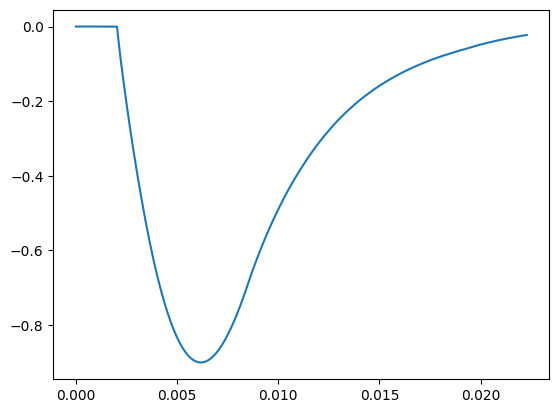

In [10]:
#Тор. поле с пояса Роговского
Rog_tor = f['AD7606-1']['tor coil rog AD7606-1:1:data'][:]
Time3 = f['AD7606-1']['Time'][:]/1000
Rog_tor1 = integrate(Time3, Rog_tor*467.262162093)
plt.plot(Time3, Rog_tor1)
print(np.min(Rog_tor))

#print(np.unravel_index(np.argmin(Rog_tor)))

-0.8989903


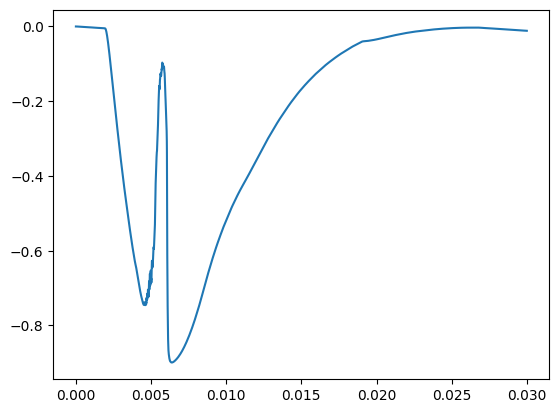

In [11]:
#def find_point_index(arr, point):
 #   for i in range(len(arr)):
  #      if arr[i] == point:
   #         return i

Rog = f['Lcard-2']['Rog. internal Lcard-2:11:data'][:]
Time4 = f['Lcard-2']['Time'][:]/1000
Rog_int1 = integrate(Time4,(Rog*3000))
fig,ax1 = plt.subplots()
Rog_tor2 = np.interp(Time4, Time3, Rog_tor1)
ax1.plot(Time4, Rog_int1)
print(np.min(Rog_int1))

#Ищем индекс
#index = find_point_index(Rog_int1, np.min(Rog_int1)) 
#print(f"Time4[{index}] = {Time4[index]}")

#print(f"Rog_tor[{Time4[index]}] = {Rog_tor2[index]}")

#Делаем нормировку
#print(f"Rog_int1[{index}] = {Rog_int1[index]}")
#print(f"Rog_tor2[{index}] = {Rog_tor2[index]}")
#print(f"Rog_int1[{index}] / Rog_tor2{[index]} = {Rog_int1[index] / Rog_tor2[index]}")

#ax1.set_xlim([0.003, 0.0065])

(0.0043, 0.0064)

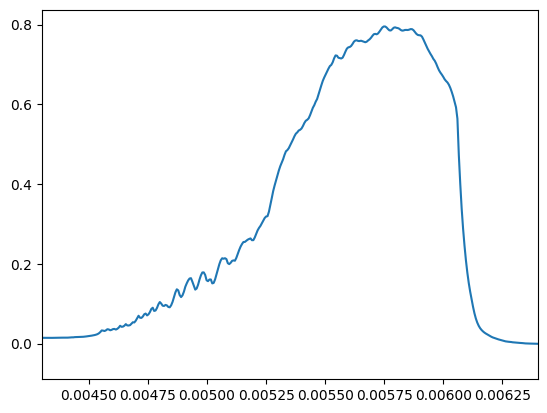

In [12]:
fig,ax1 = plt.subplots()
ax1.plot(Time4, Rog_int1 - Rog_tor2)
ax1.set_xlim([0.0043, 0.0064])

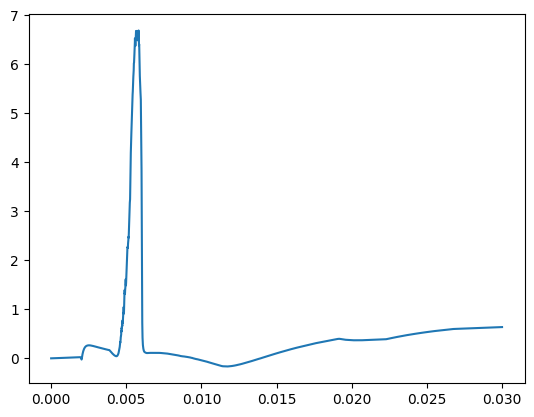

In [10]:
#from matplotlib.axis import Axis 
#import numpy as np   
#import matplotlib.pyplot as plt   
#np.random.seed(19680801)   
#Rog_int1 = np.interp(Time2,Time3,Rog_int1)
#Rog_int = integrate(Time2, (Rog)*0.2e+5)-Rog_int1
#fig,ax1 = plt.subplots()
#plt.plot(Time2, Rog_int)
#print (min(Rog_int))
#Axis.set(ax1, xlabel ='t, c', ylabel ='I, А', xlim=(0.003,0.005), ylim=(0,1.5))
#ax1.xaxis.set_ticklabels([0,003])
#ax1.set_xlim([0.003,0.005])
#ax1.set_ylim([-0.00003,0.0001])

In [13]:
def smooth_VL(U): #убрать шум
   import numpy as np
   from scipy import signal
   U_smooth1 = signal.savgol_filter(U, window_length=25, polyorder=3, mode="nearest")
   U_smooth1 = U_smooth1-np.mean(U_smooth1[0:100])
    
   return U_smooth1
    
    

In [14]:
def zero_level(U, start, end): #нулевой уровень
    import numpy as np
    U_smooth = U-np.mean(U[start:end])
    
    return U_smooth
    

(700.0, 1200.0)

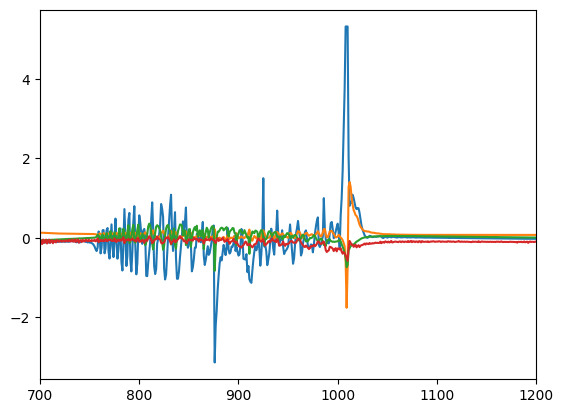

In [21]:
#Сигнал с зондов внутр

MP1 = zero_level(f['Lcard-2']['MP-1 Lcard-2:7:data'][:], 0, 150)
MP2 = zero_level(f['Lcard-2']['MP-2 Lcard-2:8:data'][:], 0, 150)
MP3 = zero_level(f['Lcard-2']['MP-3 Lcard-2:9:data'][:], 0, 150)
MP4 = zero_level(f['Lcard-2']['MP-4 Lcard-2:10:data'][:], 0, 150)

#CH1v = zero_level(f1['Lcard-2']['MP-1 Lcard-2:7:data'][:], 0, 150)
#CH2v = zero_level(f1['Lcard-2']['MP-2 Lcard-2:8:data'][:], 0, 150)
#CH3v = zero_level(f1['Lcard-2']['MP-3 Lcard-2:9:data'][:], 0, 150)
#CH4v = zero_level(f1['Lcard-2']['MP-4 Lcard-2:10:data'][:], 0, 150)
#CH4 = f['Owon-1']['MP4-1 Owon-1:3:data'][:]
Time4 = f['Lcard-2']['Time'][:]/1000
#Time5 = (f1['Lcard-2']['Time'][:]+2.5e-2)/1000

#CH1v = np.interp(Time4,Time5,CH1v)
#CH2v = np.interp(Time4,Time5,CH2v)
#CH3v = np.interp(Time4,Time5,CH3v)
#CH4v = np.interp(Time4,Time5,CH4v)

fig,ax1 = plt.subplots()
#Time = np.linspace(1,len(CH1),len(CH1))*1e-8 +2e-6
#MP1_V = -(CH1 - CH1v
#MP2_V = (CH2 - CH2v)
#MP3_V = -(CH3 - CH3v)
#MP4_V = (CH4 - CH4v)

#plt.plot(Time4,MP1_V)
plt.plot(MP1)
plt.plot(MP2)
plt.plot(MP3)
plt.plot(MP4)
#plt.plot(Time4,MP4_V)
ax1.set_xlim([700, 1200])
#ax1.set_ylim([-0.02, 0.02])

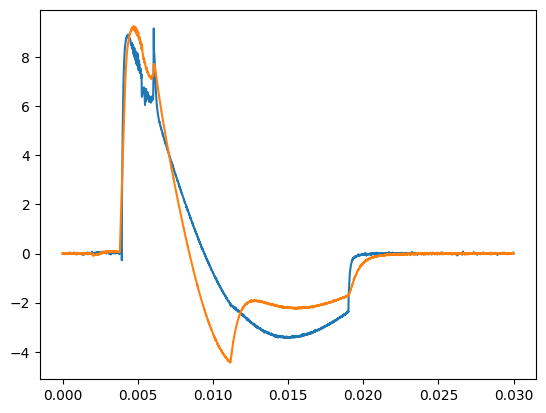

In [20]:
#Сигнал с обходов
Vl_7 = signal.detrend( f['Lcard-2']['VL-7 Lcard-2:6:data'][:], type = 'constant')*11

Vl_2 = signal.detrend( f['Lcard-2']['VL-2 Lcard-2:1:data'][:], type = 'constant')*11

plt.plot(Time4,Vl_7)
plt.plot(Time4, Vl_2)

In [22]:
# Сигнал с зондов внеш

CH01 = zero_level(f['Lcard-2']['MP-1_out Lcard-2:12:data'][:], 0, 150)
CH02 = zero_level(f['Lcard-2']['MP-2_out Lcard-2:14:data'][:], 0, 150)
CH03 = zero_level(f['Lcard-2']['MP-3_out Lcard-2:13:data'][:], 0, 150)
CH04 = zero_level(f['Lcard-2']['MP-4_out Lcard-2:15:data'][:], 0, 150)


CH01 = smooth_VL(CH01)
CH02 = smooth_VL(CH02)
CH03 = smooth_VL(CH03)
CH04 = smooth_VL(CH04)


CH01 = integrate(Time4, CH01)/MP01_NS
CH02 = integrate(Time4, CH02)/MP02_NS
CH03 = -integrate(Time4, CH03)/MP03_NS
CH04 = -integrate(Time4, CH04)/MP04_NS
fig, ax1 = plt.subplots()
# Time = np.linspace(1,len(CH1),len(CH1))*1e-8 +2e-6

# plt.plot(Time4,MP1_V)
plt.plot(CH01)
plt.plot(CH02)
plt.plot(CH03)
plt.plot(CH04)
# plt.plot(Time4,MP4_V)
# ax1.set_xlim([1000, 1200])
# ax1.set_ylim([-0.02, 0.02])

KeyError: "Unable to open object (object 'MP-1_out Lcard-2:12:data' doesn't exist)"

ValueError: fp and xp are not of the same length.

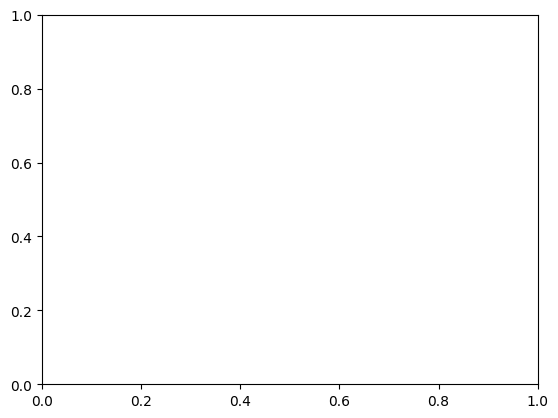

In [16]:
# Сигналы с внеш зондов и Роговского с поправкой на тороидальное поле
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

Rog_int2 = np.interp(Time4, Time3, Rog_int1)

ch01 = CH01 - (Rog_int2-0.05)*0.0042
ch02 = CH02 - Rog_int2*0.00082
ch03 = CH03 - Rog_int2*0.0055
ch04 = CH04 + Rog_int2*0.0036

#ax1.plot(Time4, Vl_7)
#ax1.axhline
# ax1.set_ylim([0,1e-3])
ax1.plot(Time4, ch01, label='MP1')
ax1.plot(Time4, ch02, label='MP2')
ax1.plot(Time4, ch03, label='MP3')
ax1.plot(Time4, ch04, label='MP4')

ax1.legend()
#ax1.set_xlim([0.008, 0.011])

(0.0, 0.03)

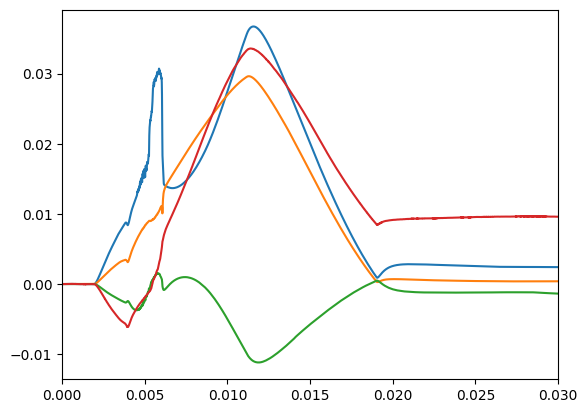

In [23]:
#Переход к нужным величинам для сигналов с зондов и обходов
MP1_B = integrate(Time4,MP1)/MP1_NS
MP2_B = integrate(Time4,MP2)/MP2_NS
MP3_B = integrate(Time4,MP3)/MP3_NS
MP4_B = integrate(Time4,MP4)/MP4_NS
#MP1 = integrate(Time4,CH1)/MP1_NS
#MP1_v = integrate(Time4,CH1v)/MP1_NS

psi_7 = integrate(Time4,Vl_7)
psi_2 = integrate(Time4,Vl_2)

fig,ax1 = plt.subplots()

#psi_2 = np.interp(Time5,Time2,psi_2)
#psi_7 = np.interp(Time5,Time2,psi_7)
plt.plot(Time4,-MP1_B)
plt.plot(Time4,MP2_B)
plt.plot(Time4,MP3_B)
plt.plot(Time4,-MP4_B)
#plt.plot(Time4, MP1)
#plt.plot(Time4, MP1_v)
#plt.plot(Time4, (MP1 - MP1_v))
ax1.set_xlim([0, 0.03])
#plt.plot(Time4, MP3_B)

(0.004, 0.006)

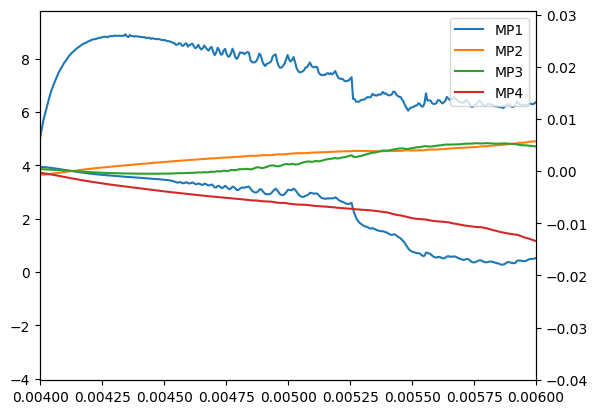

In [24]:
#Сигналы с зондов и Роговского с поправкой на тороидальное поле
mp1 = zero_level(MP1_B-(Rog_tor2)*0.01475, 400, 500)
mp2 = zero_level(MP2_B+(Rog_tor2)*0.00618, 450, 550)
mp3 = zero_level(MP3_B-(Rog_tor2)*0.0044, 400, 600)
mp4 = zero_level(MP4_B+(Rog_tor2)*0.0101, 450, 550)

fig,ax1 = plt.subplots()
ax2=ax1.twinx()

ax1.plot(Time4,Vl_7)
ax1.axhline
#ax1.set_ylim([0,1e-3])
ax2.plot(Time4,mp1,label='MP1')
ax2.plot(Time4,mp2,label='MP2')
ax2.plot(Time4,mp3,label='MP3')
ax2.plot(Time4,mp4,label='MP4')

ax2.legend()
ax1.set_xlim([0.004,0.006])

Text(0.5, 1.0, 'Вертикальное смещение')

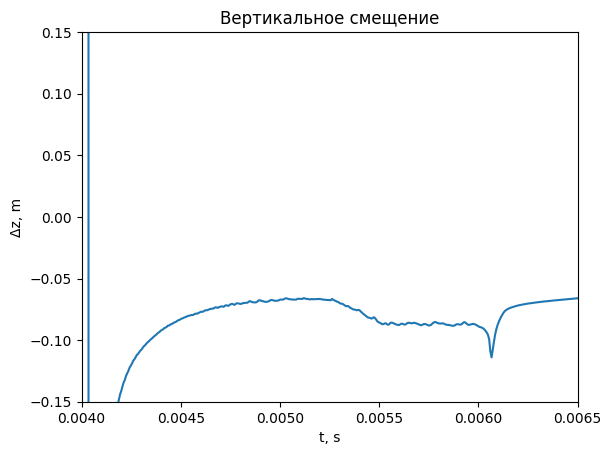

In [25]:
#вЕРТИКАЛЬНОЕ ПОЛОЖЕНИЕ 
vert=-0.22*(-mp4-mp2)/(-mp4+mp2)
#vert_vnesh = 0.22*(ch01+ch03)/(ch01-ch03)
#v1 = 0.22*(-mp4-mp2)
#v2 = 0.22*(-mp4+mp2)
fig,ax1 = plt.subplots()
ax1.plot(Time4,vert)
#ax1.plot(Time4,v1)
#ax1.plot(Time4,v2)
#ax1.plot(Time4,vert_vnesh)
col1 = "X"
col2 = "Y"
#ax1.plot(Time,vert_shiz)
#ax1.plot(Time,v1)
#ax1.plot(Time,v2)
#ax1.axhline
ax1.set_xlim([0.004,0.0065])
ax1.set_ylim([-0.15,0.15])
ax1.set_xlabel("t, s")
ax1.set_ylabel("Δz, m") 
ax1.set_title("Вертикальное смещение")
#data = pd.DataFrame({col1: Time4, col2: vert})
#data.to_excel("vert.xlsx")
#data = pd.DataFrame({col1: Time4, col2: vert_vnesh})
#data.to_excel("vert.xlsx", sheet_name="vert2", index=False)

In [19]:
#вЕРТИКАЛЬНОЕ ПОЛОЖЕНИЕ 
vert=1.6*0.13*(mp1_B-mp3_B)/(mp1_B+mp3_B)
vert_shiz=1.6*0.13*(mp1_B+mp3_B)/(mp1_B-mp3_B)
v1 = (mp4_B-mp3_B)
v2 = (mp4_B+mp3_B)
fig,ax1 = plt.subplots()
ax1.plot(Time2,vert)
ax1.set_xlabel("t, s")
ax1.set_ylabel("Δz, m") 
ax1.set_title("Вертикальное смещение")
#ax1.plot(Time,vert_shiz)
#ax1.plot(Time,v1)
#ax1.plot(Time,v2)
ax1.axhline
ax1.set_xlim([0.003,0.005])
ax1.set_ylim([-0.2,0.2])

NameError: name 'mp1_B' is not defined

(-0.11, 0.11)

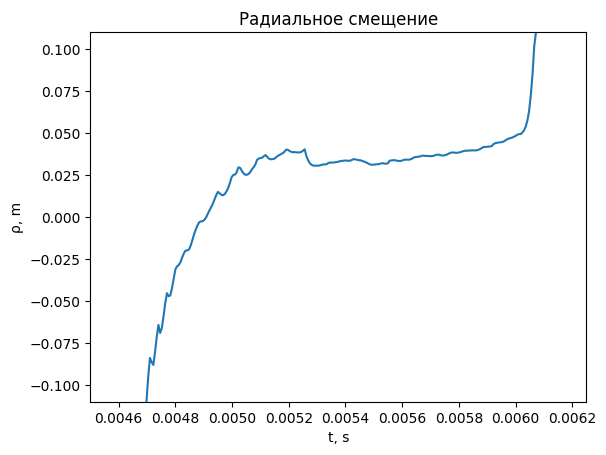

In [26]:
#ГОРИЗОНТАЛЬНОЕ ПОЛОЖЕНИЕ
fig,ax1 = plt.subplots()
#plt.plot(Time,psi_7-psi_2)
#plt.plot(Time,psi_2)
gor = ((psi_2-psi_7)-2*3.14*0.025*(0.14*(-mp1)-0.36*mp3))/(2*3.14*(0.14*(-mp1)+0.36*mp3))
#gor_vnesh = ((psi_2-psi_7)-2*3.14*0.055*(0.16*ch04+0.4*ch02))/(2*3.14*(0.16*ch04-0.4*ch02))
#ax1.plot(Time,gor)
ax1.plot(Time4,gor)
ax1.set_xlabel("t, s")
ax1.set_ylabel("ρ, m") 
ax1.set_title("Радиальное смещение")
#ax1.plot(Time4,gor_vnesh)
ax1.set_xlim([0.0045,0.00625])
ax1.set_ylim([-0.11,0.11])

(10.1, 10.35)

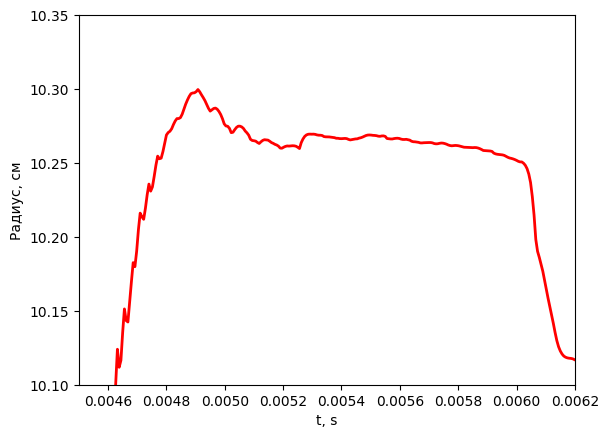

In [27]:
# Вычисление радиуса
def distanse(a, b, c, x, y):
    return abs(a * x + b * y + c) / ((a ** 2 + b ** 2) ** 0.5)

a1 = [21, 0, 29, 46, 1, 46, 29, 0, 21, 1]
b1 = [-41, 1, 69, 17, 0, -17, -69, 1, 41, 0]
c1 = [762.6, -20.7, -1727.0, -1093.8, -20.6, -1093.8, -1727.0, 20.7, 762.6, 0]

# Массив для минимальных расстояний для каждой точки
dist_min_arr = []
Time4_mod = []

# Находим минимальное расстояние до одной из прямых для каждой точки и заполняем им массив
for i in range(int(len(vert) / 1)):

    x = gor[i]+10.3
    y = vert[i]

    # Заносим первичное значение в переменную минимального расстояния для дальнейшего сравнения с другими
    dist_min = distanse(a1[9], b1[9], c1[9], x, y)

    for j in range(len(a1)): 
        dist = distanse(a1[j], b1[j], c1[j], x, y)

        if (dist < dist_min):
            dist_min = dist
    
    dist_min_arr.append(dist_min)
    Time4_mod.append(Time4[i])

# Строим график зависимости минимального расстояния от времени (скопировал с другого блока, тут я не знаю что как работает)
fig, ax1 = plt.subplots()
ax1.plot(Time4_mod, dist_min_arr, color = "r", lw = "2")
ax1.set_xlabel("t, s")
ax1.set_ylabel("Радиус, см") 
ax1.set_xlim([0.0045,0.0062])
ax1.set_ylim([10.1,10.35])

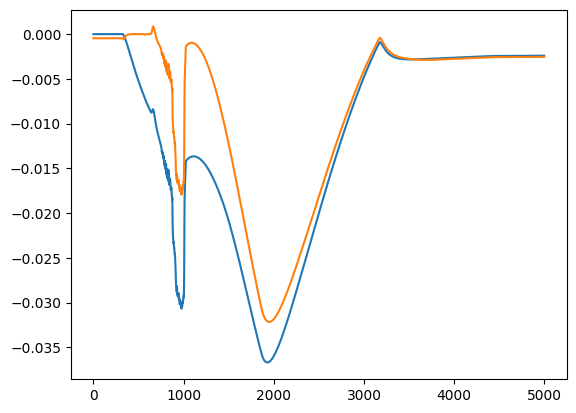

In [59]:
#Рассчет поправки для МР1
Rog_tor2 = np.interp(Time4, Time3, Rog_tor1)
fig,ax1 = plt.subplots()
mp1 =zero_level(MP1_B-(Rog_tor2)*0.01475, 400, 500)
ax1.plot(MP1_B)
ax1.plot(mp1)
#ax1.plot(Time4,Rog_tor12)
#ax1.plot([0, ], [0, 0])
#ax1.set_xlim([330,600])
#ax1.set_ylim([-0.0005,0.0001])

(-0.0003, 0.001)

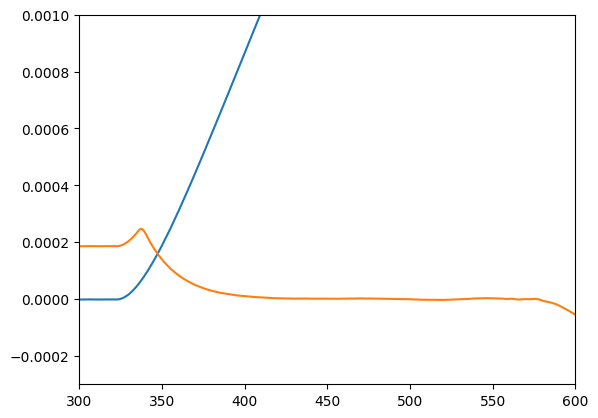

In [82]:
#Рассчет поправки для МР2
fig,ax1 = plt.subplots()
mp2 = zero_level(MP2_B+(Rog_tor2)*0.00618, 450, 550)
ax1.plot(MP2_B)
ax1.plot(mp2)
#ax1.plot(Time4,Rog_tor12)
#ax1.plot([0, ], [0, 0])
ax1.set_xlim([300,600])
ax1.set_ylim([-0.0003,0.001])

(-0.0001, 0.0002)

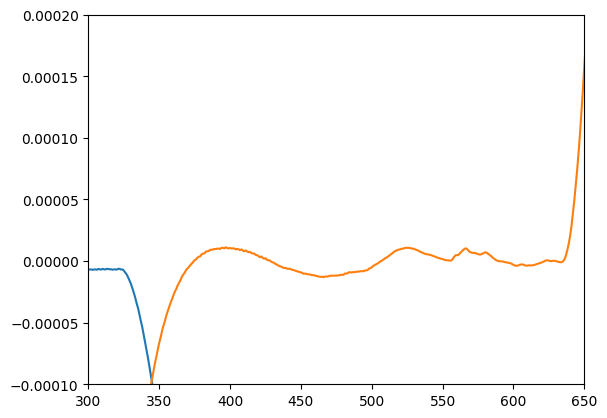

In [94]:
#Рассчет поправки для МР3
fig,ax1 = plt.subplots()
mp3 = zero_level(MP3_B-(Rog_tor2)*0.0044, 400, 600)
ax1.plot(MP3_B)
ax1.plot(mp3)
#ax1.plot(Time4,Rog_tor12)
#ax1.plot([0, ], [0, 0])
ax1.set_xlim([300, 650])
ax1.set_ylim([-0.0001,0.0002])

(-0.001, 0.003)

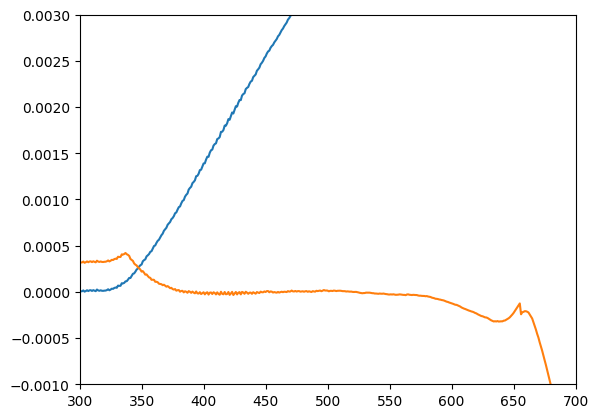

In [118]:
#Рассчет поправки для МР4
fig,ax1 = plt.subplots()
mp4 = zero_level(MP4_B+(Rog_tor2)*0.0101, 450, 550)
ax1.plot(MP4_B)
ax1.plot(mp4)
#ax1.plot(Time4,Rog_tor12)
#ax1.plot([0, ], [0, 0])
ax1.set_xlim([300,700])
ax1.set_ylim([-0.001,0.003])

In [199]:
Name = '../discharges/2024/202402/20240214/M/588M 2024-02-14 16:00:55.nxs'
#Name_vac = 'discharges/2024/202403/20240305/M/767M 2024-03-05 14:13:38.nxs'
Name_probe1 = 'Rigol_waves/468_RIGOL_CH1.txt'
Name_probe2 = 'Rigol_waves/468_RIGOL_CH2.txt'
Name_probe3 = 'Rigol_waves/468_RIGOL_CH3.txt'
Name_probe4 = 'Rigol_waves/468_RIGOL_CH4.txt'

#Num = '607M'


MP01_NS = 216.7*1e-4 #cm^2
MP02_NS = 128.9*1e-4
MP03_NS = 179.6*1e-4
MP04_NS = 149.8*1e-4

MP1_NS = 150*1e-4 #cm^2
MP2_NS = 199*1e-4
MP3_NS = 181*1e-4
MP4_NS = 182*1e-4
K_rog = 7e6
aR = 0.110
R0 = 0.248
aZ = 232

R1 = R0+aR
R2 = R0-aR

import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack


f = h5py.File(Name, 'r')
#N_discharge = '1047T'
Adress = '../Exported data/'

#f1 = h5py.File(Name_vac, 'r')
#Adress = '../Exported data/'
def integrate(time,sig):
    dt = (time[-1]-time[0])/(len(time)-1)
    return  np.cumsum(sig)*dt
    
import pandas as pd

In [200]:
from jupyterlab_h5web import H5Web
H5Web(Name)

<jupyterlab_h5web.widget.H5Web object>

In [201]:
f['AD7606-1'].keys() #для внутр зондов

<KeysViewHDF5 ['HF_coil_obereg AD7606-1:8:data', 'MP_out AD7606-1:5:data', 'PEM AD7606-1:7:data', 'PF 170 rog AD7606-1:4:data', 'PF 400 rog AD7606-1:3:data', 'Rog_in_ch AD7606-1:6:data', 'Time', 'ind rog AD7606-1:2:data', 'tor coil rog AD7606-1:1:data']>

In [202]:
f['AD7606-1'].keys()#для Роговского

<KeysViewHDF5 ['HF_coil_obereg AD7606-1:8:data', 'MP_out AD7606-1:5:data', 'PEM AD7606-1:7:data', 'PF 170 rog AD7606-1:4:data', 'PF 400 rog AD7606-1:3:data', 'Rog_in_ch AD7606-1:6:data', 'Time', 'ind rog AD7606-1:2:data', 'tor coil rog AD7606-1:1:data']>

In [203]:
f['Lcard-2'].keys() #для внеш зондов

<KeysViewHDF5 ['MP-1 Lcard-2:7:data', 'MP-2 Lcard-2:8:data', 'MP-3 Lcard-2:9:data', 'MP-4 Lcard-2:10:data', 'Rog. internal Lcard-2:11:data', 'Time', 'VL-1 Lcard-2:0:data', 'VL-2 Lcard-2:1:data', 'VL-3 Lcard-2:2:data', 'VL-4 Lcard-2:3:data', 'VL-5 Lcard-2:4:data', 'VL-6 Lcard-2:5:data', 'VL-7 Lcard-2:6:data', 'acq_time']>

-1.1779785


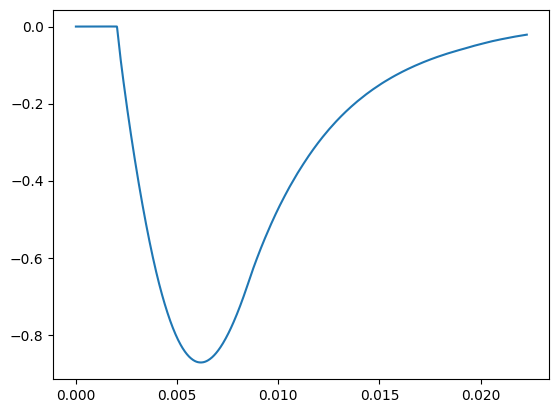

In [231]:
#Тор. поле с пояса Роговского
Rog_tor = f['AD7606-1']['tor coil rog AD7606-1:1:data'][:]
Time3 = f['AD7606-1']['Time'][:]/1000
Rog_tor1 = integrate(Time3, Rog_tor*453.5853928117)
plt.plot(Time3, Rog_tor1)
print(np.min(Rog_tor))

#print(np.unravel_index(np.argmin(Rog_tor)))

-0.86881346


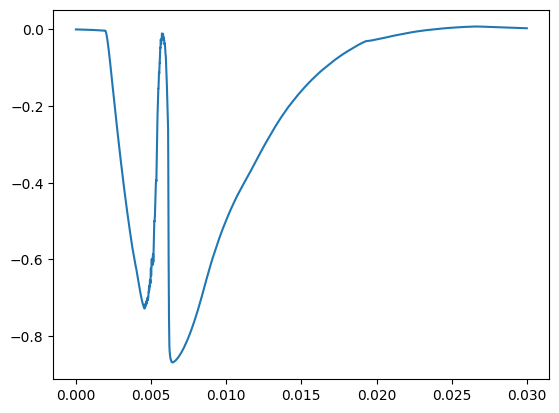

In [232]:
#def find_point_index(arr, point):
    #for i in range(len(arr)):
       #if arr[i] == point:
           #return i

Rog = f['Lcard-2']['Rog. internal Lcard-2:11:data'][:]
Time4 = f['Lcard-2']['Time'][:]/1000
Rog_int1 = integrate(Time4,(Rog*3000))
fig,ax1 = plt.subplots()
Rog_tor2 = np.interp(Time4, Time3, Rog_tor1)
ax1.plot(Time4, Rog_int1)
print(np.min(Rog_int1))

#Ищем индекс
#index = find_point_index(Rog_int1, np.min(Rog_int1)) 
#print(f"Time4[{index}] = {Time4[index]}")

#print(f"Rog_tor[{Time4[index]}] = {Rog_tor2[index]}")

#Делаем нормировку
#print(f"Rog_int1[{index}] = {Rog_int1[index]}")
#print(f"Rog_tor2[{index}] = {Rog_tor2[index]}")
#print(f"Rog_int1[{index}] / Rog_tor2{[index]} = {Rog_int1[index] / Rog_tor2[index]}")

#ax1.set_xlim([0.003, 0.0065])

(0.0043, 0.0064)

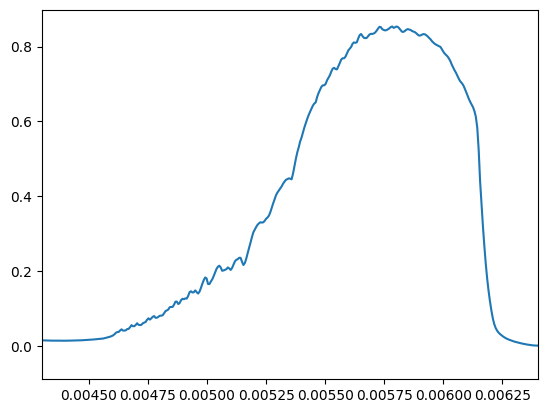

In [233]:
fig,ax1 = plt.subplots()
ax1.plot(Time4, Rog_int1 - Rog_tor2)
ax1.set_xlim([0.0043, 0.0064])

(700.0, 1200.0)

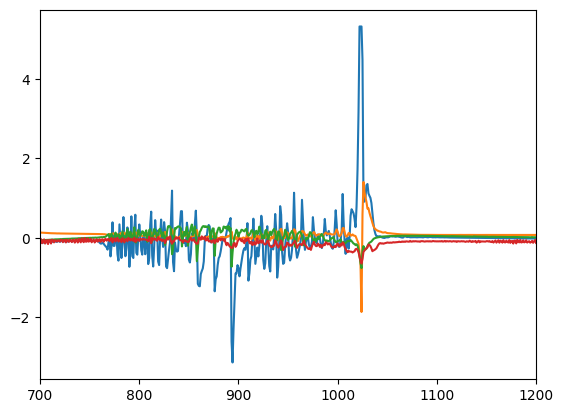

In [234]:
#Сигнал с зондов внутр

MP1 = zero_level(f['Lcard-2']['MP-1 Lcard-2:7:data'][:], 0, 150)
MP2 = zero_level(f['Lcard-2']['MP-2 Lcard-2:8:data'][:], 0, 150)
MP3 = zero_level(f['Lcard-2']['MP-3 Lcard-2:9:data'][:], 0, 150)
MP4 = zero_level(f['Lcard-2']['MP-4 Lcard-2:10:data'][:], 0, 150)

#CH1v = zero_level(f1['Lcard-2']['MP-1 Lcard-2:7:data'][:], 0, 150)
#CH2v = zero_level(f1['Lcard-2']['MP-2 Lcard-2:8:data'][:], 0, 150)
#CH3v = zero_level(f1['Lcard-2']['MP-3 Lcard-2:9:data'][:], 0, 150)
#CH4v = zero_level(f1['Lcard-2']['MP-4 Lcard-2:10:data'][:], 0, 150)
#CH4 = f['Owon-1']['MP4-1 Owon-1:3:data'][:]
Time4 = f['Lcard-2']['Time'][:]/1000
#Time5 = (f1['Lcard-2']['Time'][:]+2.5e-2)/1000

#CH1v = np.interp(Time4,Time5,CH1v)
#CH2v = np.interp(Time4,Time5,CH2v)
#CH3v = np.interp(Time4,Time5,CH3v)
#CH4v = np.interp(Time4,Time5,CH4v)

fig,ax1 = plt.subplots()
#Time = np.linspace(1,len(CH1),len(CH1))*1e-8 +2e-6
#MP1_V = -(CH1 - CH1v
#MP2_V = (CH2 - CH2v)
#MP3_V = -(CH3 - CH3v)
#MP4_V = (CH4 - CH4v)

#plt.plot(Time4,MP1_V)
plt.plot(MP1)
plt.plot(MP2)
plt.plot(MP3)
plt.plot(MP4)
#plt.plot(Time4,MP4_V)
ax1.set_xlim([700, 1200])
#ax1.set_ylim([-0.02, 0.02])

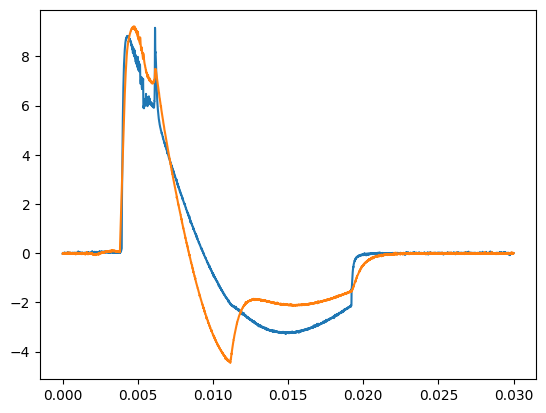

In [235]:
#Сигнал с обходов
Vl_7 = signal.detrend( f['Lcard-2']['VL-7 Lcard-2:6:data'][:], type = 'constant')*11

Vl_2 = signal.detrend( f['Lcard-2']['VL-2 Lcard-2:1:data'][:], type = 'constant')*11

plt.plot(Time4,Vl_7)
plt.plot(Time4, Vl_2)

(0.0, 0.03)

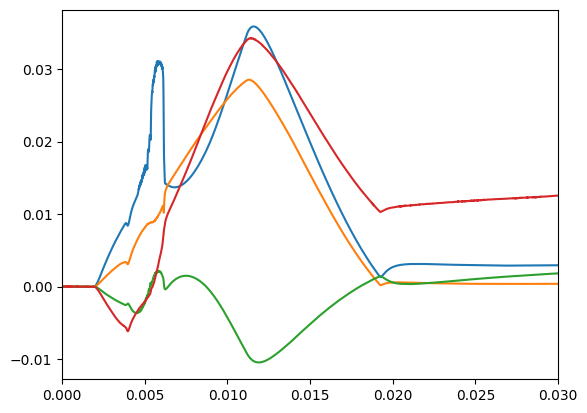

In [236]:
#Переход к нужным величинам для сигналов с зондов и обходов
MP1_B = integrate(Time4,MP1)/MP1_NS
MP2_B = integrate(Time4,MP2)/MP2_NS
MP3_B = integrate(Time4,MP3)/MP3_NS
MP4_B = integrate(Time4,MP4)/MP4_NS
#MP1 = integrate(Time4,CH1)/MP1_NS
#MP1_v = integrate(Time4,CH1v)/MP1_NS

psi_7 = integrate(Time4,Vl_7)
psi_2 = integrate(Time4,Vl_2)

fig,ax1 = plt.subplots()

#psi_2 = np.interp(Time5,Time2,psi_2)
#psi_7 = np.interp(Time5,Time2,psi_7)
plt.plot(Time4,-MP1_B)
plt.plot(Time4,MP2_B)
plt.plot(Time4,MP3_B)
plt.plot(Time4,-MP4_B)
#plt.plot(Time4, MP1)
#plt.plot(Time4, MP1_v)
#plt.plot(Time4, (MP1 - MP1_v))
ax1.set_xlim([0, 0.03])
#plt.plot(Time4, MP3_B)

(0.004, 0.006)

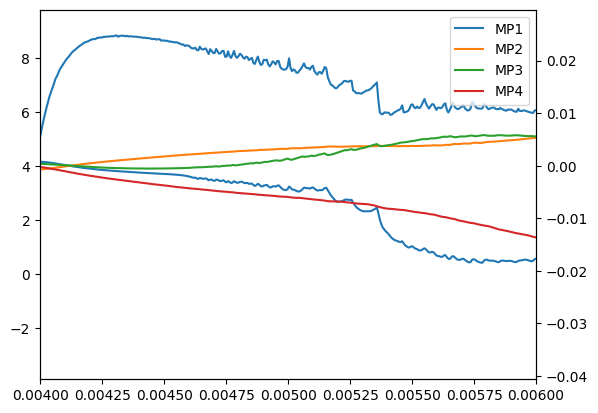

In [210]:
#Сигналы с зондов и Роговского с поправкой на тороидальное поле
mp1 = zero_level(MP1_B-(Rog_tor2)*0.01515, 400, 500)
mp2 = zero_level(MP2_B+(Rog_tor2)*0.00625, 450, 550)
mp3 = zero_level(MP3_B-(Rog_tor2)*0.00435, 400, 600)
mp4 = zero_level(MP4_B+(Rog_tor2)*0.0105, 450, 550)

fig,ax1 = plt.subplots()
ax2=ax1.twinx()

ax1.plot(Time4,Vl_7)
ax1.axhline
#ax1.set_ylim([0,1e-3])
ax2.plot(Time4,mp1,label='MP1')
ax2.plot(Time4,mp2,label='MP2')
ax2.plot(Time4,mp3,label='MP3')
ax2.plot(Time4,mp4,label='MP4')

ax2.legend()
ax1.set_xlim([0.004,0.006])

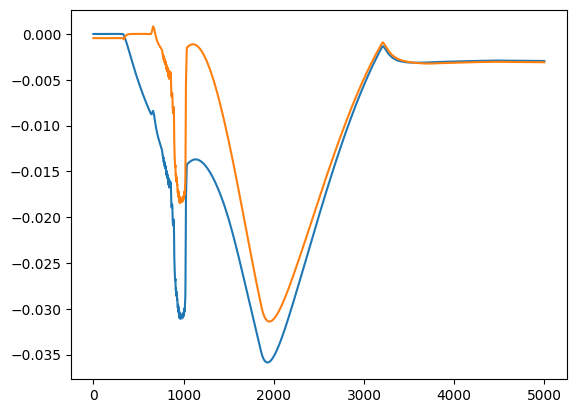

In [212]:
#Рассчет поправки для МР1
Rog_tor2 = np.interp(Time4, Time3, Rog_tor1)
fig,ax1 = plt.subplots()
mp1 =zero_level(MP1_B-(Rog_tor2)*0.01515, 400, 500)
ax1.plot(MP1_B)
ax1.plot(mp1)
#ax1.plot(Time4,Rog_tor12)
#ax1.plot([0, ], [0, 0])
#ax1.set_xlim([330,800])
#ax1.set_ylim([-0.0001,0.0001])

(-0.0003, 0.001)

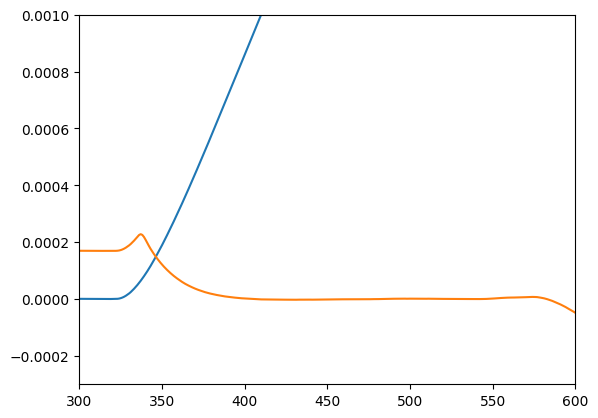

In [182]:
#Рассчет поправки для МР2
fig,ax1 = plt.subplots()
mp2 = zero_level(MP2_B+(Rog_tor2)*0.00625, 450, 550)
ax1.plot(MP2_B)
ax1.plot(mp2)
#ax1.plot(Time4,Rog_tor12)
#ax1.plot([0, ], [0, 0])
ax1.set_xlim([300,600])
ax1.set_ylim([-0.0003,0.001])

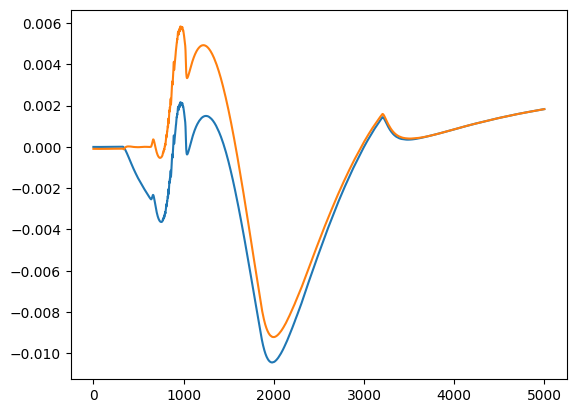

In [213]:
#Рассчет поправки для МР3
fig,ax1 = plt.subplots()
mp3 = zero_level(MP3_B-(Rog_tor2)*0.00435, 400, 600)
ax1.plot(MP3_B)
ax1.plot(mp3)
#ax1.plot(Time4,Rog_tor12)
#ax1.plot([0, ], [0, 0])
#ax1.set_xlim([300, 650])
#ax1.set_ylim([-0.0001,0.0002])

(-0.001, 0.003)

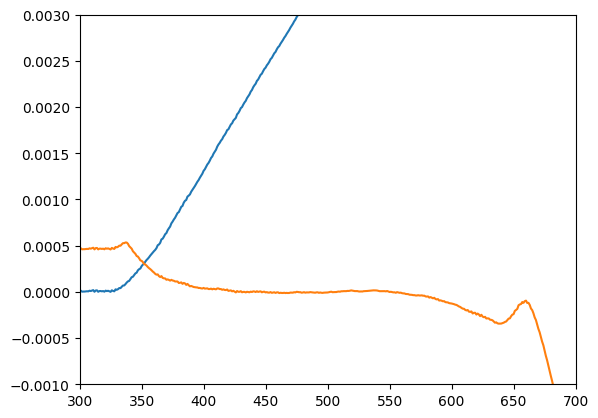

In [195]:
#Рассчет поправки для МР4
fig,ax1 = plt.subplots()
mp4 = zero_level(MP4_B+(Rog_tor2)*0.0105, 450, 550)
ax1.plot(MP4_B)
ax1.plot(mp4)
#ax1.plot(Time4,Rog_tor12)
#ax1.plot([0, ], [0, 0])
ax1.set_xlim([300,700])
ax1.set_ylim([-0.001,0.003])

(-0.22, 0.22)

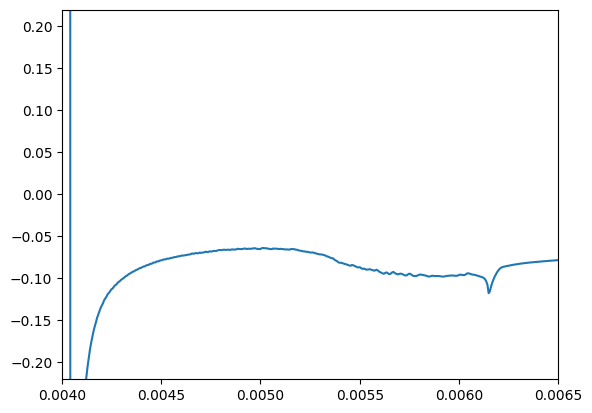

In [230]:
#вЕРТИКАЛЬНОЕ ПОЛОЖЕНИЕ 
vert=-0.22*(-mp4-mp2)/(-mp4+mp2)
#vert_vnesh = 0.22*(ch01+ch03)/(ch01-ch03)
#v1 = 0.22*(-mp4-mp2)
#v2 = 0.22*(-mp4+mp2)
fig,ax1 = plt.subplots()
ax1.plot(Time4,vert)
#ax1.plot(Time4,v1)
#ax1.plot(Time4,v2)
#ax1.plot(Time4,vert_vnesh)
col1 = "X"
col2 = "Y"
#ax1.plot(Time,vert_shiz)
#ax1.plot(Time,v1)
#ax1.plot(Time,v2)
#ax1.axhline
ax1.set_xlim([0.004,0.0065])
ax1.set_ylim([-0.22,0.22])
#data = pd.DataFrame({col1: Time4, col2: vert})
#data.to_excel("vert.xlsx")
#data = pd.DataFrame({col1: Time4, col2: vert_vnesh})
#data.to_excel("vert.xlsx", sheet_name="vert2", index=False)

(-0.11, 0.11)

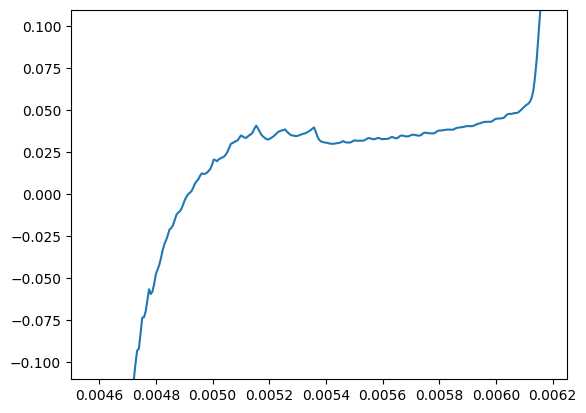

In [198]:
#ГОРИЗОНТАЛЬНОЕ ПОЛОЖЕНИЕ
fig,ax1 = plt.subplots()
#plt.plot(Time,psi_7-psi_2)
#plt.plot(Time,psi_2)
gor = ((psi_2-psi_7)-2*3.14*0.025*(0.14*(-mp1)-0.36*mp3))/(2*3.14*(0.14*(-mp1)+0.36*mp3))
#gor_vnesh = ((psi_2-psi_7)-2*3.14*0.055*(0.16*ch04+0.4*ch02))/(2*3.14*(0.16*ch04-0.4*ch02))
#ax1.plot(Time,gor)
ax1.plot(Time4,gor)
#ax1.plot(Time4,gor_vnesh)
ax1.set_xlim([0.0045,0.00625])
ax1.set_ylim([-0.11,0.11])

(-0.003, 0.003)

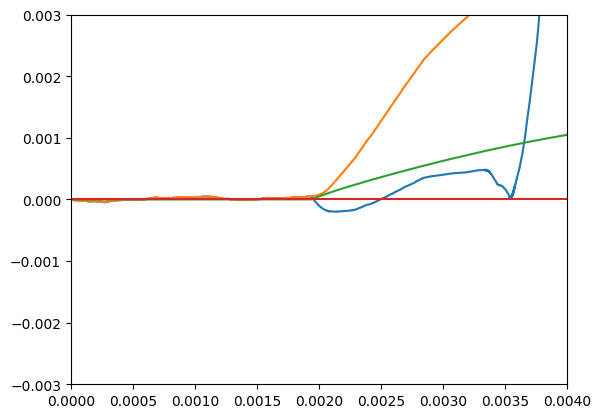

In [23]:
#Рассчет поправки для МР2
Rog_int2 = np.interp(Time,Time2,Rog_int)

fig,ax1 = plt.subplots()
mp2_B = MP2_B - Rog_int2*3.5
ax1.plot(Time,mp2_B)
ax1.plot(Time,MP2_B)
ax1.plot(Time,Rog_int2)
ax1.plot([0, 0.004], [0, 0])
ax1.set_xlim([0,0.004])
ax1.set_ylim([-0.003,0.003])

In [21]:
#Рассчет поправки для МР3
Rog_int2 = np.interp(Time,Time2,Rog_int)

fig,ax1 = plt.subplots()
mp3_B = MP3_B + Rog_int2*2
ax1.plot(Time,mp3_B)
ax1.plot(Time,MP3_B)
ax1.plot(Time,Rog_int2)
ax1.plot([0, 0.004], [0, 0])
ax1.set_xlim([0,0.004])
ax1.set_ylim([-0.003,0.003])

ValueError: fp and xp are not of the same length.

In [23]:
#Рассчет поправки для МР4
Rog_int2 = np.interp(Time,Time2,Rog_int)

fig,ax1 = plt.subplots()
mp4_B = MP4_B - Rog_int2*1.9
ax1.plot(Time,mp4_B)
ax1.plot(Time,MP4_B)
ax1.plot(Time,Rog_int2)
ax1.plot([0, 0.004], [0, 0])
ax1.set_xlim([0,0.004])
ax1.set_ylim([-0.003,0.003])

ValueError: fp and xp are not of the same length.

In [24]:
def smooth_VL(U): #убрать шум
    import numpy as np
    from scipy import signal
    U_smooth = signal.savgol_filter(U, window_length=20, polyorder=3, mode="nearest")
    U_smooth = U_smooth-np.mean(U_smooth[0:100])
    
    return U_smooth

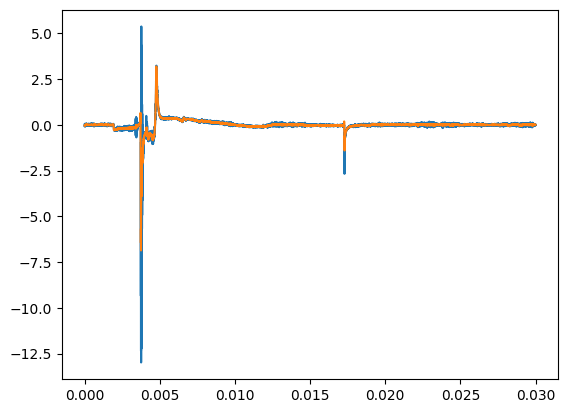

In [160]:
#ВНЕШНИЕ ЗОНДЫ
N_MP_4=143
N_MP_2=107
S=1e-4
MP1_0 = f['Lcard-2']['MP1_tan Lcard-2:7:data'][:]
MP2_0 = f['Lcard-2']['MP2_tan Lcard-2:11:data'][:]
MP3_0 = f['Lcard-2']['MP3_tan Lcard-2:9:data'][:]
MP4_0 = f['Lcard-2']['MP4_tan Lcard-2:12:data'][:]

MP1_d = smooth_VL(MP1_0)
MP2_d = smooth_VL(MP2_0)
MP3_d = smooth_VL(MP3_0)
MP4_d = smooth_VL(MP4_0)

#plt.plot(Time2,MP1_0)
#plt.plot(Time2,MP2_0)
#plt.plot(Time2,MP3_0)
plt.plot(Time3,MP4_0)
#plt.plot(Time3,MP1_d)
#plt.plot(Time3,MP2_d)
#plt.plot(Time3,MP3_d)
plt.plot(Time3,MP4_d)

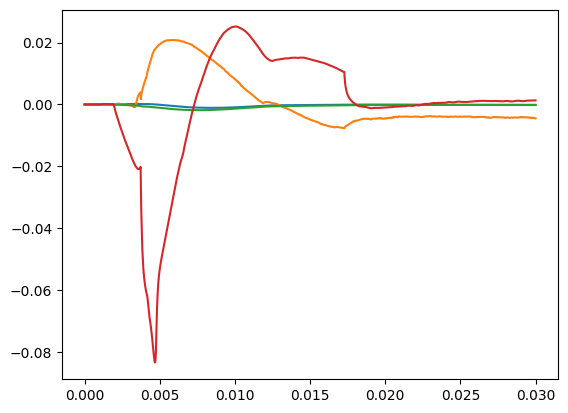

In [161]:
#ИНТЕГРИРОВАНИЕ СИГНАЛА С ВНЕШНИХ
MP1_0B = integrate(Time3,MP1_d)
MP2_0B = integrate(Time3,MP2_d)/(N_MP_4*S)
MP3_0B = integrate(Time3,MP3_d)
MP4_0B = integrate(Time3,MP4_d)/(N_MP_4*S)

plt.plot(Time3,MP1_0B)
plt.plot(Time3,MP2_0B)
plt.plot(Time3,MP3_0B)
plt.plot(Time3,MP4_0B)

(0.0, 0.006)

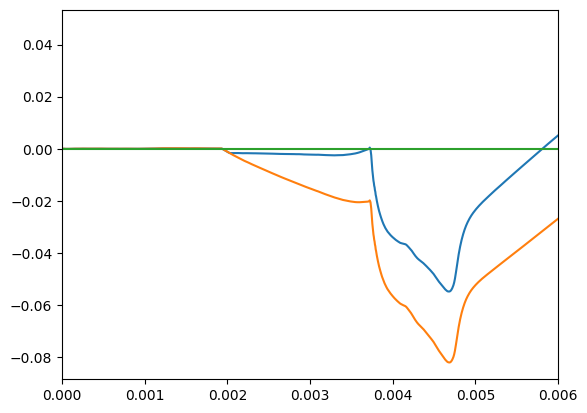

In [149]:
#Рассчет поправки для МР4
Rog_int3 = np.interp(Time3,Time2,Rog_int)
fig,ax1 = plt.subplots()
mp4_0B = MP4_0B + Rog_int3*22
ax1.plot(Time3,mp4_0B)
ax1.plot(Time3,MP4_0B)
#ax1.plot(Time3,Rog_int3)
ax1.plot([0, 0.04], [0, 0])
ax1.set_xlim([0,0.006])
#ax1.set_ylim([-0.003,0.003])

ValueError: x and y must have same first dimension, but have shapes (1000000,) and (1520,)

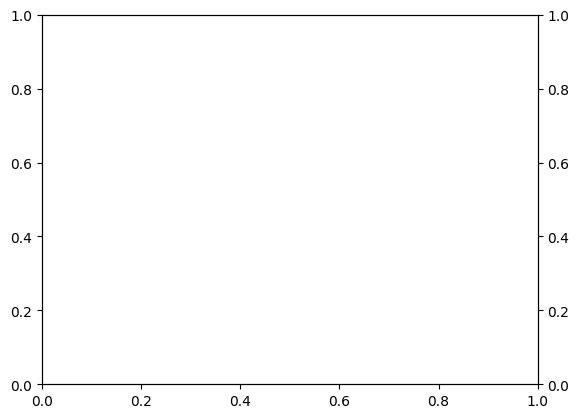

In [150]:
#С УЧЁТОМ ТОР ПОЛЯ
fig,ax1 = plt.subplots()
ax2=ax1.twinx()

ax1.plot(Time,Vl_7)
ax1.axhline
#ax1.set_ylim([0,1e-3])
ax2.plot(Time3,MP1_0B,label='MP1')
ax2.plot(Time3,MP2_0B,label='MP2')
ax2.plot(Time3,MP3_0B,label='MP3')
ax2.plot(Time3,MP4_0B,label='MP4')

ax2.legend()
ax1.set_xlim([0,6e-3])

(0.0, 0.01)

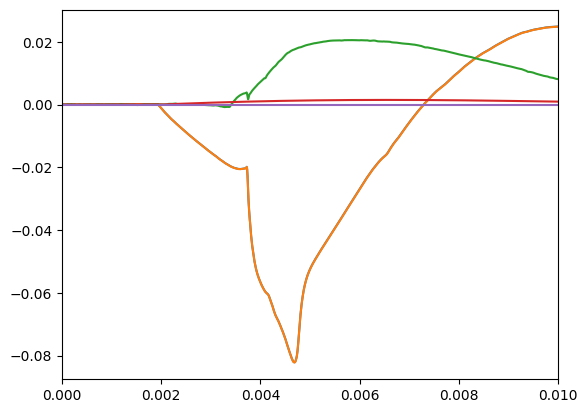

In [151]:

fig,ax1 = plt.subplots()
mp4_0B = MP4_0B + Rog_int3*0.045
ax1.plot(Time3,mp4_0B)
ax1.plot(Time3,MP4_0B)
ax1.plot(Time3,MP2_0B)
ax1.plot(Time3,Rog_int3)

ax1.plot([0, 0.04], [0, 0])
ax1.set_xlim([0, 0.01])
#ax1.set_ylim([-0.003,0.003])

(0.0, 0.006)

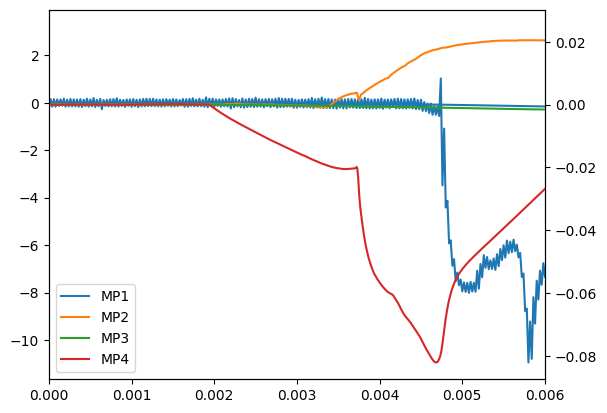

In [152]:
fig,ax1 = plt.subplots()
ax2=ax1.twinx()

MP1_0B = MP1_0B-np.mean(MP1_0B[0:100])
MP2_0B = MP2_0B-np.mean(MP2_0B[0:100])
MP3_0B = MP3_0B-np.mean(MP3_0B[0:100])
mp4_0B = mp4_0B-np.mean(mp4_0B[0:100])


ax1.plot(Time1,Vl_7)
ax1.axhline
#ax1.set_ylim([0,1e-3])
ax2.plot(Time3,MP1_0B,label='MP1')
ax2.plot(Time3,MP2_0B,label='MP2')
ax2.plot(Time3,MP3_0B,label='MP3')
ax2.plot(Time3,mp4_0B,label='MP4')

ax2.legend()
ax1.set_xlim([0,6e-3])

(-0.5, 0.5)

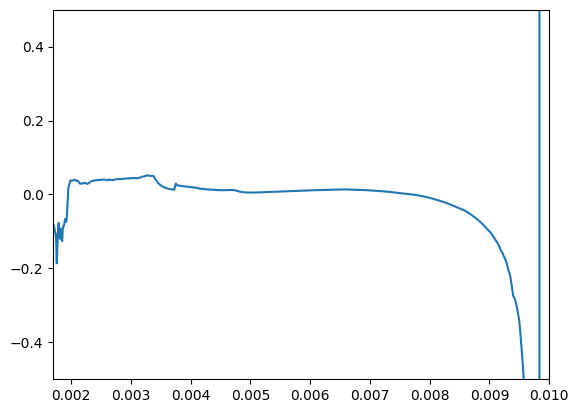

In [169]:
#ГОРИЗОНТАЛЬНОЕ ПОЛОЖЕНИЕ
psi_7 = integrate(Time1,Vl_7)
psi_2 = integrate(Time1,Vl_2)
psi_2 = np.interp(Time3,Time1,psi_2)
psi_7 = np.interp(Time3,Time1,psi_7)
fig,ax1 = plt.subplots()
#plt.plot(Time2,psi_7)
#plt.plot(Time2,psi_2)
#gg = (0.13*MP4_0B-0.37*mp2_0B)
gor = -((psi_7-psi_2)-2*3.14*0.04*(0.13*MP4_0B+0.37*MP2_0B)/(2*3.14*(0.13*MP4_0B-0.37*MP2_0B)))
ax1.plot(Time3,gor)
#ax1.plot(Time3,gg)
ax1.set_xlim([0.0017,0.01])
ax1.set_ylim([-0.5,0.5])

ValueError: operands could not be broadcast together with shapes (6666,) (4000,) 

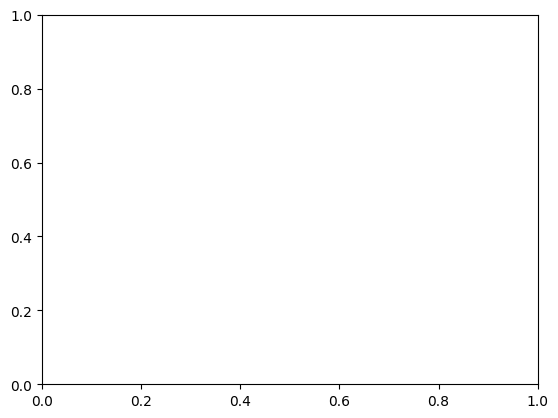

In [165]:
fig,ax1 = plt.subplots()
mp2_0B = MP2_0B - Rog_int
#ax1.plot(Time2,mp2_0B)
ax1.plot(Time2,MP2_0B)
#ax1.plot(Time2,Rog_int)
#ax1.plot([0, 0.004], [0, 0])
#ax1.set_xlim([0,0.004])
#ax1.set_ylim([-0.001,0.001])

(-0.2, 0.2)

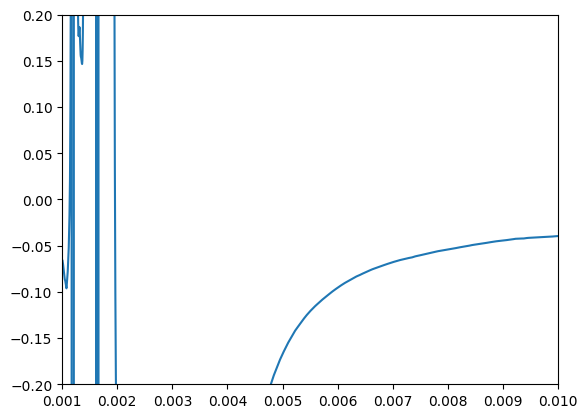

In [170]:
#вЕРТИКАЛЬНОЕ ПОЛОЖЕНИЕ 
vert=1.6*0.13*(MP1_0B-MP3_0B)/(MP1_0B+MP3_0B)
vert_shiz=1.6*0.13*(MP1_0B+MP3_0B)/(MP1_0B-MP3_0B)
v1 = (MP4_0B-MP3_0B)
v2 = (MP4_0B+MP3_0B)
fig,ax1 = plt.subplots()
ax1.plot(Time3,vert)
#ax1.plot(Time,vert_shiz)
#ax1.plot(Time,v1)
#ax1.plot(Time,v2)
ax1.axhline
ax1.set_xlim([0.001,0.01])
ax1.set_ylim([-0.2,0.2])